# **CAP 6629: Reinforcement Learning**

> **Coursse Project 2**

- Shaun Pritchard
- March 4, 2022

## **Project 2 Reinforcement Learning Algorithms**

> For this project, I wanted a versatile implementation, so I selected the following algorithms:

- Monte Carlo
- Q-learning
- Dynmic Programming (value Itteration)


## **Initialize Project Dependancies**

### Project Graphical Dependancies

In [ ]:
# Interactive Imports and controls
!pip install pyglet~=1.3.2
!apt install -y graphviz
!pip install flax
!pip install graphviz
!pip install pyvirtualdisplay
!apt-get install python-opengl -y
!apt install xvfb -y

import flax
from graphviz import Digraph
import jax
import jax.numpy as jnp


from IPython.display import HTML
from pprint import pprint
import logging
from pyvirtualdisplay import Display
logging.getLogger("pyvirtualdisplay").setLevel(logging.ERROR)

display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display)

     |████████████████████████████████| 1.0 MB 4.2 MB/s 
  Attempting uninstall: pyglet
    Found existing installation: pyglet 1.5.0
    Uninstalling pyglet-1.5.0:
      Successfully uninstalled pyglet-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires pyglet<=1.5.0,>=1.4.0, but you have pyglet 1.3.3 which is incompatible.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
     |████████████████████████████████| 176 kB 4.2 MB/s 
     |████████████████████████████████| 136 kB 50.2 MB/s 
     |████████████████████████████████| 70 kB 11.3 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgle3
The following N

### Project Libaries

In [ ]:
#Global Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import cv2
import seaborn as sns

# **Dynamic Programming Algorithm (Value Itteration)**


This algorithm finds the best policy for a MDP based on value iteration. Essentially, it determines the utility of each state as the sum of discounted rewards from that state onward. In this case the utlity is the bellman equation. After calculating the utilities of states, we can use them to select an action that is optimal for each state.

\begin{document}
1. **Function** $Value-Itteration(mdp-α)$ returns a utility function
1. **inputs** mdp an MDP with state $S$, actions $A(s)$, transition model $P(s'|s,a)$, rewards $R(s)$, discount $\gamma$
$α$, the maximum errir allowed in the utility of any state

1. **Local variables:**  $U,U'$, vector of utilities for state in $S$, initilly set to zero  $S$ the max change in the utility of anystate in an itterations

  - **Repeat**
    - $ U 	\leftarrow U'; 	\lambda	\leftarrow 0$
    - **for each state$s$ in $S$
do**
    - $U'[s] - u[s] | > $ $\gamma$  $max_aαA(s)$ = \begin{equation}‎
{{‎‎\sum P(s' |s,a) U[s']}}‎‎
\end{equation}

    - **if** $U'[s] - u[s] |>$‎‎ $\lambda$ then $\lambda$ $|U'[s] - U[s] | until$  $\gamma$ < $\epsilon(1-$\gamma$)/$\gamma$$
      - **return** $U$ 

In [ ]:
# Initialize environment
row = 3
col = 4

# Non-terminal state rewards
α = -0.01 
γ = 0.99

# Action sequneces Down, Left, Up, Right
A = [(1, 0), (0, -1), (-1, 0), (0, 1)] 
# Acton steps
Steps = 4

# Error Rate
Max_Err = 10**(-3)

# Define untility control
U = [[0, 0, 0, 1], [0, 0, 0, -1], [0, 0, 0, 0], [0, 0, 0, 0]]

# Construct a random policy
rand_policy = [[random.randint(0, 3) for j in range(col)] for i in range(row)] 

# Get the utility of the state reached by performing the given action from the given state
def utility(U, r, c, action):
    dr, dc = A[action]
    newR, newC = r+dr, c+dc
    if newR < 0 or newC < 0 or newR >= row or newC >= col or (newR == newC == 1): # collide with the boundary or the wall
        return U[r][c]
    else:
        return U[newR][newC]

# Calculate the utility of a state per each given action
def calc_util(U, r, c, action):
    u = R
    u += 0.1 * γ * utility(U, r, c, (action-1)%4)
    u += 0.8 * γ * utility(U, r, c, action)
    u += 0.1 * γ * utility(U, r, c, (action+1)%4)
    return u

# value iteration steps to approximate the util
def evaluate_Policy(rand_policy, U):
    while True:
        nextU = [[0, 0, 0, 1], [0, 0, 0, -1], [0, 0, 0, 0], [0, 0, 0, 0]]
        error = 0
        for r in range(row):
            for c in range(col):
                if (r <= 1 and c == 3) or (r == c == 1):
                    continue
                nextU[r][c] = calc_util(U, r, c, rand_policy[r][c]) # simplified Bellman update
                error = max(error, abs(nextU[r][c]-U[r][c]))
        U = nextU
        if error < Max_Err * (1-γ) / γ:
            break
    return U
# Actions during the policy iteration
def policy_itter(rand_policy, U):
    while True:
        U = evaluate_Policy(rand_policy, U)
        unchanged = True
        for r in range(row):
            for c in range(col):
                if (r <= 1 and c == 3) or (r == c == 1):
                    continue
                maxAction, maxU = None, -float("inf")
                for action in range(Steps):
                    u = calc_util(U, r, c, action)
                    if u > maxU:
                        maxAction, maxU = action, u
                if maxU > calc_util(U, r, c, rand_policy[r][c]):
                    rand_policy[r][c] = maxAction # the action that maximizes the utility
                    unchanged = False
        if unchanged:
            break
    return rand_policy

In [ ]:
print('Random policy after evaluation:', rand_policy, '\n')
print('Retrun U: ', U)

Random policy after evaluation: [[3, 3, 0, 0], [0, 3, 2, 3], [1, 2, 3, 0]] 

Retrun U:  [[0, 0, 0, 1], [0, 0, 0, -1], [0, 0, 0, 0], [0, 0, 0, 0]]


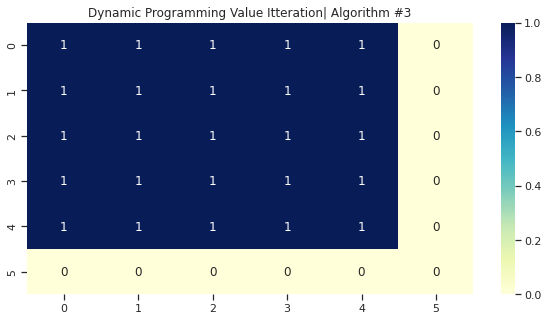

In [ ]:
policy_table_3 = np.zeros((6, 6))
plt.title('Dynamic Programming Value Itteration| Algorithm #3')
for i in range(5):
    for j in range(5):
        policy_table_3[i][j]=np.max(U)
grd = sns.heatmap(policy_table_3, cmap="YlGnBu", annot=True)
grd

# **Monte Carlo Method Algorithm**

### PsedoCode Overview of Monte Carlo Algorithm
Monte Carlo is a is a model-free algorithm that does not have a complete understanding of the environment. Since Monte Carlo is a random algorithm, it does not predict the state to the next state after our actions. Since it is model free, we don't know where the next state is from our actions. The Monte Carlo estimates the value functions to find optimal policy based on experience.

In this case, Monte-Carlo method is implemented with gridworld on-policy method. The Monte Carlo methods can be classified as on-policy or off-policy methods. The information about the policy currently being executed is of interest to us when we use on-policy methods. A off-policy method is concerned with learning information about our target policy π from our behavior policy 

**PseduoCode:**
The algorithm is as:

1.  Initialize for all s α $S$, a α $A(s)$:
1.  $Q(s,a)$, <--- arbitrary
1.  Initialize a list $Returns$ of $|\mathcal{S}|\times|\mathcal{A}|$ elements which accumulates the returns for each state.
1.  Initialize $\pi(a|s)$ <--- and abitrary $α$-soft policy
1.  Repeat Forever:
    1.  Generate the episode using $\pi$ 
    1. For each pair $s$,$a$ <-- average(Returns(s,a))
      * $G = 0$  <-- return following the first occurrence o
      * Append $G$ to $Returns(s,a)$
      * $Q(s, a)$ <-- $Average Returns(s,a)$
    1.  For each $s$ in the episode
        1.  $A*$ <-- $argmax_a$ $Q(s,a)$
            *  For all $a$ $α A(s)$:
            * π(a|s) -\begin{Bmatrix}{ 1- α +α/ |A(s)| if a =A*}\\
{α / |A(s)|      if a !=A*}
\end{Bmatrix}


In [ ]:
# Iniitlize policy vector
pi=np.empty((5, 5, 4))

# Initilize actions
episodes = 20
runs=1

# Global variables
α = 0.5 # α
γ = 0.5  # gamma

# Enviromental actions
As = np.asarray(['Up', 'Down', 'Right', 'Left'])

#initalize rewards per state
Rs=np.zeros((5, 5)) 

# End state with reward of 1
Rs[4][4]=1 

#starting point state
S=list((0, 0)) 

# Initilize  policy steps per episode 
policy_1 = np.empty((runs, episodes))



for i in range(runs):    
    Q_table_1 = np.zeros((5, 5, 4))
    for j in range(5):
        for k in range(5):
            for l in range(4):
                pi[j][k][l]=1/len(As)
    returns=[]
# itterate through state and action per episode
    for m in range(episodes):        
        state_vector=[]
        action_vector=[]
        count=0

# Loop forever...
        while S !=[4, 4]:
            state_vector.append(S)
            action_vector.append(A)
            A = np.random.choice(4, 1, replace=True, p=pi[S[0]-1][S[1]-1]) 

# Check condition based on action and direction of state in the enviroment
            if As[A]=='Up':        
                S_p = list(S)
                S_p[1]+=1
                if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                    S_p=list(S)               
                S = S_p  

            elif As[A]=='Down':
                S_p=list(S)
                S_p[1]-=1
                if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                    S_p=list(S)                    
                S=S_p  

            elif As[A]=='Right':
                S_p=list(S)
                S_p[0]+=1
                if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                    S_p=list(S)
                S = S_p        

            elif As[A]=='Left':
                S_p=list(S)
                S_p[0]-=1
                if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                    S_p=list(S)            
                S=S_p
           # Increment count
            count+=1            
        S=list((0, 0))        
        G=0

        sa=[]   # Initilize state action list
        for state in state_vector:
            for action in action_vector:
                if (state, action) not in sa:
                    sa.append((state, action))                                            
                    if As[action]=='Up':
                        if state[1]+1<=4:                        
                            G=γ*G+Rs[state[0]][state[1]+1]
                        else:
                            G=γ*G+Rs[state[0]][state[1]]
                    elif As[action]=='Down':
                        if state[1]-1>=0:
                            G=γ*G+Rs[state[0]][state[1]-1]
                        else:
                            G=γ*G+Rs[state[0]][state[1]]
                    elif As[action]=='Right':
                        if state[0]+1<=4:
                            G=γ*G+Rs[state[0]+1][state[1]]
                        else:
                            G=γ*G+Rs[state[0]][state[1]]
                    elif As[action]=='Left':
                        if state[0]-1>=0:
                            G=γ*G+Rs[state[0]-1][state[1]]
                        else:
                            G=γ*G+Rs[state[0]][state[1]]
                    # Append state actions to G
                    returns.append(G)  
                    # Update Q-table and caluate average return 
                    Q_table_1[state[0]][state[1]][action]=np.average(returns)

        for state in state_vector:
            A=np.argmax(Q_table_1[state[0]][state[1]])
            for n in range(len(As)):
                if n==A:                
                    pi[state[0]][state[1]][n]=(1-α)+(α/len(As))                    
                else:
                    pi[state[0]][state[1]][n]=α/len(As)     

        policy_1[i][m]=count

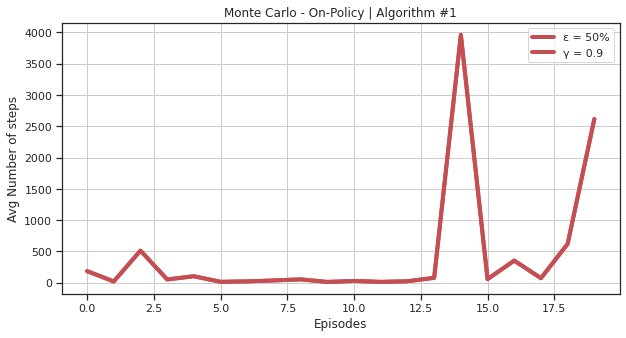

In [ ]:
# Algorithm 1 Monte Carlo
output_1 = np.mean(policy_1, axis=0)
sns.set(style="ticks")
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(output_1, label='α = 50%', linewidth = '4', c='r')
plt.plot(output_1, label='γ = 0.9', linewidth = '4', c='r')
# Plot
plt.title('Monte Carlo - On-Policy | Algorithm #1')
plt.xlabel('Episodes')
plt.ylabel('Avg Number of steps')
plt.grid() 
plt.legend()
plt.show()



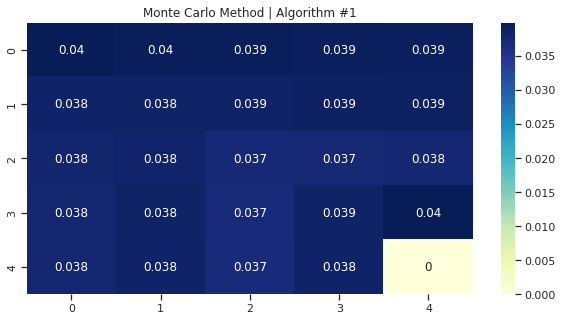

In [ ]:
# Heatmap output for Q-table 1
policy_table_1 = np.zeros((5, 5))
plt.title('Monte Carlo Method | Algorithm #1')
for i in range(5):
    for j in range(5):
        policy_table_1[i][j]=np.max(Q_table_1[i][j])
grd = sns.heatmap(policy_table_1, cmap="YlGnBu", annot=True)
grd

In [ ]:
# # Validate inference average of episode
# print('Average state per episode', policy_1)

# **Q-Learning Algorithm**

$Q^{\pi}(s, a) = V^{\pi}(s) + \alpha\left[ r + \gamma V^{\pi}(s') - V^{\pi}(s)\right]$

Here, $\alpha\in[0, 1]$ is the _step size_, based on new evidence from the environment, we will determine how aggressively we should update our estimates. 

Q-value is assigned to every possible state or action in Q-learning. It can be thought of as the expected future rewards R of taking action A when in a particular state S; the Q-value thus representing that futuristic reward. Agents in this grid world continue taking actions until they reach their terminal state, updating their Q-values.

### PsedoCode Overview of Q-Learning Algorithm
1.  Initialize $Q$ and $\pi$, and pick a start state $s$.
1.  While learning:
   1.  Pick action $a$ according to $\pi$ (and any exploratory policy).
   1.  Send $a$ to the environment and receive $s'$ and $r$ in return.
   1.  Compute the TD-error as:<br>
   $\delta = r + \gamma \max_{a'\in\mathcal{A}}Q(s', a') - Q(s, a)$
   1.  Update the estimate for $Q(s, a)$ as follows:<br>
   $Q(s, a) = Q(s, a) + \alpha\delta$
   1.  $\pi(s) = \arg\max_{a\in\mathcal{A}} Q(s, a)$
   1.  Update $s = s'$.

In [ ]:
# Initilize actions
runs=1000
episodes=50

# Global variables
α  =0.1 # Epsilon
γ = 0.9  # gamma

# Initilize Steps per episode max
policy_2 = np.empty((runs, episodes))

#starting point state list tuple
S=list((0, 0)) 

As=np.asarray(['Up', 'Down', 'Right', 'Left']) #possible actions

# Initalize rewards for each state in enviroment
Rs=np.zeros((5, 5)) 

# Goal per state has reward of one 
Rs[4][4]=1 

# Initialize itteration per episode through Q-table
for i in range(runs):    
    Q_table_2 = np.zeros((5, 5, 4))
    for j in range(episodes):
        # Initilize count
        count=0
        while S !=[4, 4]: 
            # Implemnt randomn Stocahstic propblibilty variable       
            p = random.random()
            if p < 1-α:
                A = np.argmax(Q_table_2[S[0]][S[1]])
                
                if As[A]=='Up':        
                    S_p=list(S)
                    S_p[1]+=1
                    if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                        S_p=list(S)                
                    Q_table_2[S[0]][S[1]][A]=Rs[S_p[0]][S_p[1]]+(γ*np.max(Q_table_2[S_p[0]][S_p[1]]))
                    S = S_p   

                elif As[A]=='Down':
                    S_p=list(S)
                    S_p[1]-=1
                    if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                        S_p=list(S)
                    Q_table_2[S[0]][S[1]][A]=Rs[S_p[0]][S_p[1]]+(γ*np.max(Q_table_2[S_p[0]][S_p[1]]))
                    S = S_p    

                elif As[A]=='Right':
                    S_p=list(S)
                    S_p[0]+=1
                    if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                        S_p=list(S)
                    Q_table_2[S[0]][S[1]][A]=Rs[S_p[0]][S_p[1]]+(γ*np.max(Q_table_2[S_p[0]][S_p[1]]))
                    S = S_p     

                elif As[A]=='Left':
                    S_p=list(S)
                    S_p[0]-=1
                    if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                        S_p=list(S)
                    Q_table_2[S[0]][S[1]][A]=Rs[S_p[0]][S_p[1]]+(γ*np.max(Q_table_2[S_p[0]][S_p[1]]))
                    S = S_p
                # Increment count
                count+=1

            else:            
                A=np.random.randint(0, len(As))
                if As[A]=='Up':        
                    S_p=list(S)
                    S_p[1]+=1
                    if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                        S_p=list(S)
                    Q_table_2[S[0]][S[1]][A]=Rs[S_p[0]][S_p[1]]+(γ*np.max(Q_table_2[S_p[0]][S_p[1]]))
                    S = S_p     

                elif As[A]=='Down':
                    S_p=list(S)
                    S_p[1]-=1
                    if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                        S_p=list(S)
                    Q_table_2[S[0]][S[1]][A]=Rs[S_p[0]][S_p[1]]+(γ*np.max(Q_table_2[S_p[0]][S_p[1]]))
                    S = S_p    

                elif As[A]=='Right':
                    S_p=list(S)
                    S_p[0]+=1
                    if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                        S_p=list(S)
                    Q_table_2[S[0]][S[1]][A]=Rs[S_p[0]][S_p[1]]+(γ*np.max(Q_table_2[S_p[0]][S_p[1]]))
                    S = S_p    

                elif As[A]=='Left':
                    S_p=list(S)
                    S_p[0]-=1
                    if S_p[0] < 0 or S_p[0] > 4 or S_p[1] <0 or S_p[1]>4:
                        S_p=list(S)
                    Q_table_2[S[0]][S[1]][A]=Rs[S_p[0]][S_p[1]]+(γ*np.max(Q_table_2[S_p[0]][S_p[1]]))
                    S = S_p
                # Increment count
                count+=1
        # Parse vetor to list
        S=list((0, 0))
        policy_2[i][j]=count    

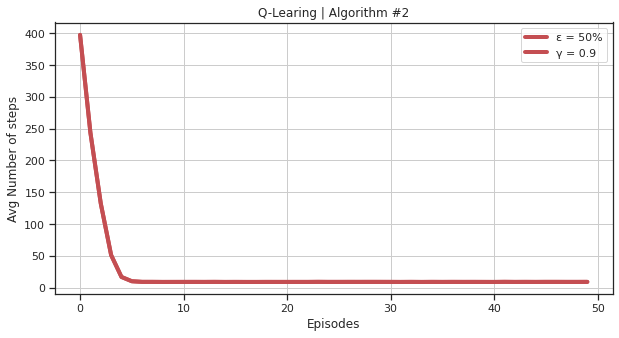

In [ ]:
# Algorithm 2 Q-Learning
output_2 = np.mean(policy_2, axis=0)
sns.set(style="ticks")
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(output_2, label='α = 50%', linewidth = '4', c='r')
plt.plot(output_2, label='γ = 0.9', linewidth = '4', c='r')
# Plot
plt.title('Q-Learing | Algorithm #2')
plt.xlabel('Episodes')
plt.ylabel('Avg Number of steps')
plt.grid() 
plt.legend()
plt.show()

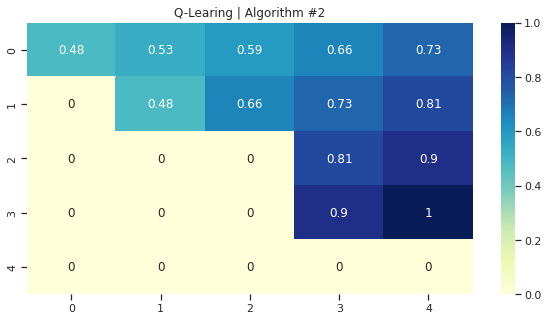

In [ ]:
policy_table_2 = np.zeros((5, 5))
plt.title('Q-Learing | Algorithm #2')
for i in range(5):
    for j in range(5):
        policy_table_2[i][j]=np.max(Q_table_2[i][j])
grd = sns.heatmap(policy_table_2, cmap="YlGnBu", annot=True)
grd

# **Algorithm Results**

- ### **Dynmic Programming**:  
the results hsow that this alorithm had faster computation and less resources is yet limited to the vlaue itteration for finding the optimal policy. Also thestate transisitons are dependant on a deterrminisdit model defined in the algorithm. Also, step updates are biased on the initial conditions of the learning parameters. 
- ### **Monte Carlo** : 
this algorithm in comparison preformed the slowest. Monte Carlo control methods do not have this problem, because each update is based on a true sample of what Q(s,a) should be. The Monte Carlo method can, however, suffer from high variance, which means it requires more samples to achieve the same degree of learning compared to DP and Q-learning.  Steps required for the agent to reach its goal are counted in each episode, then averaged over the 1000 iterations:

- ### **Q-Learning algorithm** : 
Q-learning while being model free implemented faster computation and complexity  with average step to action ratio when meeting the goal. while this algorithm implements an agent who can enter a new situation with no prior knowledge and a bigger state space.  Steps required for the agent to reach its goal are counted in each episode, then averaged over the 1000 iterations. Compared to the other results of the latter algorithms it is uncompritive.

Here is a link to the working Google Colab project for these algorithms:
-  https://colab.research.google.com/drive/1_aDTl0VjSezW-syzHssqAK0-JXkboN8_?usp=sharing


Shaun Pritchard * spritchard1@fau.edu.com * 03/11/2022